## 1. Generate Pairwise CDS, Proteins by Family

In [ ]:
#!/usr/bin/env python3
import pandas as pd
from Bio import SeqIO
import os
import sys

# Input clustering file
input_path = "../output/clusters/protein_families_filtered_blast_results_id30_qcov50_scov50_wcol12_network.tsv"
df = pd.read_csv(input_path, sep="\t")

# Longest isoform IDs
longest_ids = set(pd.read_csv("../data/protein_info_longest.csv")["peptide_id"].tolist())

# Read CDS fasta
cds_records = {rec.id: rec for rec in SeqIO.parse("../data/cds.fa", "fasta") if rec.id in longest_ids}

# Read protein fasta
prot_records = SeqIO.to_dict(SeqIO.parse("../data/peptides_longest.fa", "fasta"))

# Output folders
cds_out = "../output/ks/cds"
prot_out = "../output/ks/proteins"
os.makedirs(cds_out, exist_ok=True)
os.makedirs(prot_out, exist_ok=True)

# Select the range of families to run
start, end = 3, 7221

print(f"▶ Processing families {start} to {end}")

# Loop only families in range
for fam in range(start, end+1):
    fam_genes = df[df["family"] == fam]["geneName"].tolist()
    if not fam_genes:
        continue

    fam_cds_dir = os.path.join(cds_out, f"family{fam}")
    fam_prot_dir = os.path.join(prot_out, f"family{fam}")
    os.makedirs(fam_cds_dir, exist_ok=True)
    os.makedirs(fam_prot_dir, exist_ok=True)

    # Generate all unique pairs
    for i in range(len(fam_genes)):
        for j in range(i+1, len(fam_genes)):
            id1, id2 = fam_genes[i], fam_genes[j]

            # CDS pair
            if id1 in cds_records and id2 in cds_records:
                cds_file = os.path.join(fam_cds_dir, f"{id1}_vs_{id2}.fa")
                with open(cds_file, "w") as out:
                    SeqIO.write(cds_records[id1], out, "fasta")
                    SeqIO.write(cds_records[id2], out, "fasta")

            # Protein pair
            if id1 in prot_records and id2 in prot_records:
                prot_file = os.path.join(fam_prot_dir, f"{id1}_vs_{id2}_prot.fa")
                with open(prot_file, "w") as out:
                    SeqIO.write(prot_records[id1], out, "fasta")
                    SeqIO.write(prot_records[id2], out, "fasta")

print(f"Pairwise CDS FASTA files written to {cds_out}/family{start}..{end}/")
print(f"Pairwise protein FASTA files written to {prot_out}/family{start}..{end}/")


▶ Processing families 86 to 7221
Pairwise CDS FASTA files written to ../output/ks/cds/family86..7221/
Pairwise protein FASTA files written to ../output/ks/proteins/family86..7221/


## 2. Align Proteic Sequences using Clustalw2

Implemented as bash script: 2_align_proteins.sh

## 3. Align CDS Sequences using Pal2nal
Implemented as bash script: 3_generate_phy.sh

## 4. Generate Control file
Implemented as bash script: 4_generate_clt.sh

## 5. Runn yn00
Implemented as bash script: 5_run_yn00.sh


## 6. Visualize Ks distribution

                   Pair      Ks
0  KRH09098_vs_KRH35351  2.0000
1  KRH09098_vs_KRH35351  0.7060
2  KRH09098_vs_KRH38552  2.0000
3  KRH09098_vs_KRH38552  0.0896
4  KRH35351_vs_KRH38552  2.0000


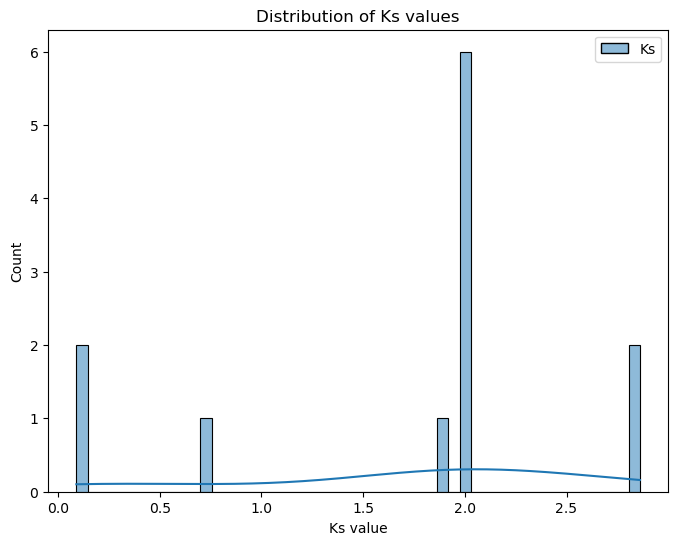

In [ ]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

records = []
for ds_file in glob.glob("../output/ks/results/*/*/2YN.dS"):
    pair = os.path.basename(os.path.dirname(ds_file))
    with open(ds_file) as f:
        lines = [l.strip() for l in f if l.strip()]
        for line in lines:
            parts = line.split()
            for val in parts:
                try:
                    ks = float(val)
                    records.append({"Pair": pair, "Ks": ks})
                except ValueError:
                    pass

df = pd.DataFrame(records)
print(df.head())

plt.figure(figsize=(8,6))
sns.histplot(df, bins=50, kde=True, color="steelblue")
plt.xlabel("Ks value")
plt.ylabel("Count")
plt.title("Distribution of Ks values")
plt.show()
